In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Linear regression

In [2]:
def linear_regression(X, Y, learn_rate = 0.0001, epochs=100000, a=0, b=0):
    n = float(len(X))
    for i in range(epochs):
        Y_hat = a*X+b
        a = a - learn_rate *  (-2/n) * sum(X * (Y - Y_hat))
        b = b - learn_rate * (-2/n) * sum(Y - Y_hat)
    return (a, b, Y_hat)

In [3]:
X = np.array(range(100))
Y = 1.5 * X + 6 + np.random.randn(len(X))
print ('X', X)
print('Y',Y)

X [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Y [  7.10120156   8.16909354   8.95439853   8.48557814  12.39752191
  13.64421023  14.36500879  15.59520694  18.50520778  17.77960164
  20.41786017  22.37383404  25.47020654  23.04966811  27.91462158
  29.35563561  30.95793706  31.91095654  33.47060376  33.3697733
  36.53125125  39.29113334  40.66936683  40.19059417  39.58705633
  44.16238807  43.77794794  45.57698706  46.74870534  48.69954264
  50.046591    53.06634677  53.11660797  55.29722     58.37495536
  60.49638564  60.20112979  61.5587945   62.26975351  63.46489397
  64.58185012  66.96189842  69.30468687  70.9894051   69.42885543
  74.84518202  75.96464464  74.67357892  77.94353596  80.16661993
  83.29631144  81.76237965  84.

In [4]:
a_res, b_res, y_res = linear_regression(X, Y)
print("a: ", a_res)
print("b: ", b_res)

a:  1.5000795724122322
b:  5.9455989914675795


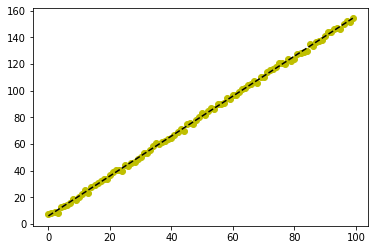

In [5]:
plt.plot(X, Y, 'yo', X, y_res, '--k')


Logistic regression

In [6]:
def generate_dataset():
    mean1 = [0, 0]
    cov1 = [[1, 0], [0, 100]]
    
    mean2 = [10, 10]
    cov2 = [[10, 0], [0, 30]]
    
    class1 = np.random.multivariate_normal(mean1, cov1, 1000)
    class2 = np.random.multivariate_normal(mean2, cov2, 1000)
    
    X = np.concatenate((class1, class2), axis=0)
    Y = np.concatenate((np.array([0] * 1000), np.array([1]*1000)))
    return X,Y
    
def train_test_split(X, Y, test_fraction=0.3):
    indices = np.random.permutation(X.shape[0])
    train_size = int(X.shape[0] * (1 - test_fraction))
    training_idx, test_idx = indices[:train_size], indices[train_size:]
    return X[training_idx,:], X[test_idx,:], Y[training_idx], Y[test_idx]
    

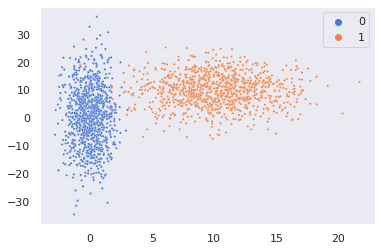

In [15]:
X,Y = generate_dataset()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
sns.set_theme(style="dark")
sns.scatterplot(x=X[:,0], y=X[:,1], s=5, hue=Y, palette="muted")

In [13]:
class LogisticReg:
    
    def __init__(self, lr=0.01, max_iter=1000):
        self.lr = lr
        self.epochs = max_iter
    
    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.e**(-z))
    
    def cost_function(self, X, Y, weights):                 
        z = np.dot(X, weights)
        predict_1 = Y * log(self.sigmoid(z))
        predict_0 = (1 - Y) * log(1 - self.sigmoid(z))
        return -sum(predict_1 + predict_0) / len(X)
    
    def fit(self, X, Y):
        X = np.c_[X, np.ones(X.shape[0])]    
        weights = np.random.rand(X.shape[1])
        N = len(X)
                 
        for _ in range(self.epochs):        
            Y_pred = self.sigmoid(np.dot(X, weights))
            weights -= self.lr * np.dot(X.T,  Y_pred - Y) / N
            
        self.weights = weights
    
    def predict(self, X):
        X = np.c_[X, np.ones(X.shape[0])] 
        z = np.dot(X, self.weights)
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]
    
    def predict_proba(self, X):
        X = np.c_[X, np.ones(X.shape[0])] 
        z = np.dot(X, self.weights)
        return np.array((self.sigmoid(z),1-self.sigmoid(z))).T

In [24]:
def generate_dataset():
    mean1 = [0, 0]
    cov1 = [[1, 0], [0, 100]]
    
    mean2 = [10, 10]
    cov2 = [[10, 0], [0, 30]]
    
    class1 = np.random.multivariate_normal(mean1, cov1, 1000)
    class2 = np.random.multivariate_normal(mean2, cov2, 1000)
    
    X = np.concatenate((class1, class2), axis=0)
    Y = np.concatenate((np.array([0] * 1000), np.array([1]*1000)))
    return X,Y
    
def train_test_split(X, Y, test_fraction=0.3):
    indices = np.random.permutation(X.shape[0])
    train_size = int(X.shape[0] * (1 - test_fraction))
    training_idx, test_idx = indices[:train_size], indices[train_size:]
    return X[training_idx,:], X[test_idx,:], Y[training_idx], Y[test_idx]
    
    

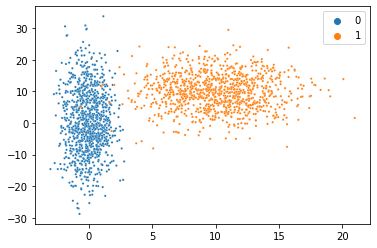

In [25]:
X,Y = generate_dataset()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
sns.scatterplot(x=X[:,0], y=X[:,1], s=5, hue=Y)

In [16]:
log_reg = LogisticReg()
log_reg.fit(X_train,Y_train)
Y_pred = log_reg.predict(X_test)
print('Accuracy: ',np.mean(Y_pred==Y_test))

Accuracy:  0.9933333333333333


[(-30.0, 40.0), (-5.0, 20.0)]

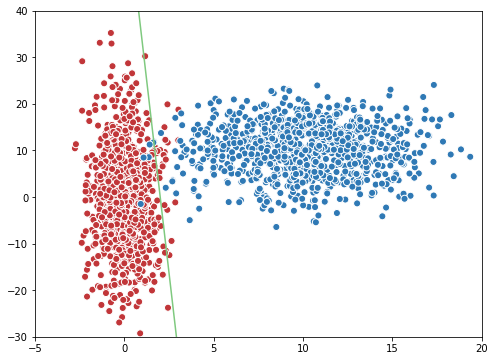

In [17]:
xx, yy = np.mgrid[-50:50:.1, -50:50:.1]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = log_reg.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs, levels=[.5], cmap="Accent", vmin=0, vmax=10000)

ax.scatter(X[100:,0], X[100:, 1], c=Y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(xlim=(-5, 20), ylim=(-30, 40))

CART

In [32]:
class Node:
    def __init__(self, predicted_class):
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

class DecisionTreeClassifier:
    def __init__(self, max_depth=4):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes_ = len(set(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def predict(self, X):
        return [self._predict(inputs) for inputs in X]

    def _best_split(self, X, y):
        m = y.size
        if m <= 1:
            return None, None
        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]
        best_gini = 1.0 - sum((n / m) ** 2 for n in num_parent)
        best_idx, best_thr = None, None
        for idx in range(self.n_features_):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()
            for i in range(1, m):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum(
                    (num_left[x] / i) ** 2 for x in range(self.n_classes_)
                )
                gini_right = 1.0 - sum(
                    (num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_)
                )
                gini = (i * gini_left + (m - i) * gini_right) / m
                if thresholds[i] == thresholds[i - 1]:
                    continue
                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2
        return best_idx, best_thr

    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(predicted_class=predicted_class)
        if depth < self.max_depth:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def _predict(self, inputs):
        node = self.tree_
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class

In [33]:
cart = DecisionTreeClassifier(max_depth = 5)
cart.fit(X_train, Y_train)
Y_pred = cart.predict(X_test)
#cart.print_tree()
print('Accuracy: ',np.mean(Y_pred==Y_test))

Accuracy:  0.995
